In [ ]:
'''
Introduction to Wrapper Methods
Machine learning problems often involve datasets with many features. 
Some of those features might be very important for a specific machine learning model.
Other features might be irrelevant. Given a feature set and a model, we would like to be able to 
distinguish between important and unimportant features (or even important combinations of features). 
Wrapper methods do exactly that.

A wrapper method for feature selection is an algorithm that selects features by evaluating the performance of a 
machine learning model on different subsets of features. These algorithms add or remove features one at a 
time based on how useful those features are to the model.

Wrapper methods have some advantages over filter methods. The main advantage is that wrapper methods 
evaluate features based on their performance with a specific model. Filter methods, on the other hand, 
can’t tell how important a feature is to a model.

Another upside of wrapper methods is that they can take into account relationships between features. 
Sometimes certain features aren’t very useful on their own but instead perform well only when combined 
with other features. Since wrapper methods test subsets of features, they can account for those situations.

This lesson will explain five different wrapper methods:

Sequential forward selection
Sequential backward selection
Sequential forward floating selection
Sequential backward floating selection
Recursive feature elimination
You’ll learn how to implement these algorithms in Python and evaluate the results.
'''

In [1]:
'''
The data in the workspace was taken from the UCI Machine Learning Repository. 
The outcome variable, Classification, is a 1 if a patient has breast cancer and a 0 if not. 
The features are Age, BMI (body mass index), Glucose, Insulin, HOMA (homeostatic model assessment, a measure of insulin resistance),
as well as four different protein levels: Leptin, Adiponectin, Resistin, and MCP.1.


'''
import pandas as pd
#import codecademylib3

# Load the data
health = pd.read_csv("dataR2.csv")

print(health.head())


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


In [ ]:
'''
Setting Up a Logistic Regression Model
Before we can use a wrapper method, we need to specify a machine learning model. We’ll train a logistic regression model on the health data and see how well it performs.

We’ll prepare the data by splitting it into a pandas DataFrame X and a pandas Series y. 
X will contain the observations of the independent variables,
and y will contain the observations of the dependent variable.
'''

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data
health = pd.read_csv("dataR2.csv")
# Split independent and dependent variables
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Fit the model
lr.fit(X,y)

# Print the accuracy of the model
print(lr.score(X,y))

0.8017241379310345


In [ ]:
'''
Sequential Forward Selection
Now that we have a specific machine learning model, we can use a wrapper method to choose a smaller feature subset.

Sequential forward selection is a wrapper method that builds a feature set by starting with no features and 
then adding one feature at a time until a desired number of features is reached. In the first step, 
the algorithm will train and test a model using only one feature at a time. 
The algorithm keeps the feature that performs best.

In each subsequent step, the algorithm will test the model on each possible new feature addition. 
Whichever feature improves model performance the most is then added to the feature subset.
This process stops once we have the desired number of features.

Let’s say we want to use three features, and we have five features to choose from: age, height, weight, 
blood_pressure, and resting_heart_rate. Sequential forward selection will train your machine learning model 
on five different feature subsets: one for each feature.

If the model performs best on the subset {age}, the algorithm will then train and 
test the model on the following four subsets:

{age, height}
{age, weight}
{age, blood_pressure}
{age, resting_heart_rate}
If the model performs best on {age, resting_heart_rate}, 
the algorithm will test the model on the following three subsets:

{age, height, resting_heart_rate}
{age, weight, resting_heart_rate}
{age, blood_pressure, resting_heart_rate}
If the model performs best on {age, weight, resting_heart_rate}, 
it will stop the algorithm and use that feature set.

Sequential forward selection is a greedy algorithm: instead of checking every possible feature set by brute force, 
it adds whichever feature gives the best immediate performance gain.
'''



In [5]:
set1 = {"age", "height", "weight", "resting_heart_rate"}
set2 = {"age", "weight", "blood_pressure", "resting_heart_rate"}

In [ ]:
'''
Sequential Forward Selection with mlxtend
Recall from a previous exercise that the logistic regression model was about 80.2% accurate at predicting 
if a patient had breast cancer. 
But there were NINE different features. Are all of those features necessary, 
or is it possible that the model could make accurate predictions with fewer features? 
That would make the model easier to understand, and it could simplify diagnosis.

We will use the SFS class from Python’s mlxtend library to implement sequential forward selection and 
choose a subset of just THREE features for the logistic regression model that we used earlier.
'''



In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr,
          k_features=3,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit the sequential forward selection model
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(3, 3), scoring='accuracy')

In [ ]:
'''
Evaluating the Result of Sequential Forward Selection
The sfs object that you fit in the previous exercise contains information about the sequential forward selection 
that was applied to your feature set. The .subsets_ attribute allows you to see much of that information, 
including which feature was chosen at each step and the model’s 
accuracy after each feature addition.
'''

('Age', 'Glucose', 'Insulin')
0.7672413793103449


/Users/robertfokming/opt/anaconda3/envs/feature/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/robertfokming/opt/anaconda3/envs/feature/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


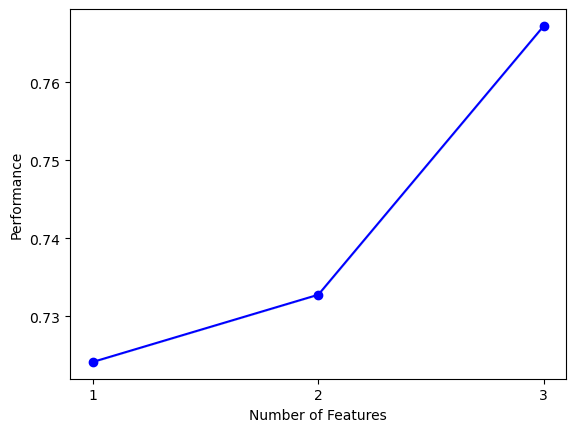

In [10]:
import pandas as pd
#import codecademylib3
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr,
          k_features=3,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)
sfs.fit(X, y)

# Print the chosen feature names
print(sfs.subsets_[3]['feature_names'])

# Print the accuracy of the model after sequential forward selection
print(sfs.subsets_[3]['avg_score'])

# Plot the model accuracy
plot_sfs(sfs.get_metric_dict())
plt.show()

In [ ]:
'''
Sequential Backward Selection with mlxtend
Sequential backward selection is another wrapper method for feature selection. 
It is very similar to sequential forward selection, but there is one key difference.
Instead of starting with no features and adding one feature at a time, sequential backward selection 
starts with all of the available features and removes one feature at a time.

Let’s again say we want to use three of the following five features: age, height, weight, blood_pressure, 
and resting_heart_rate. Sequential backward selection will start by training whatever machine learning model 
you are using on five different feature subsets, one for each possible feature removal:

{height, weight, blood_pressure, resting_heart_rate}
{age, weight, blood_pressure, resting_heart_rate}
{age, height, blood_pressure, resting_heart_rate}
{age, height, weight, resting_heart_rate}
{age, height, weight, blood_pressure}
Let’s say that out of the five subsets, the model performed best on the subset without blood_pressure. 
Then the algorithm will proceed with the feature set {age, height, weight, resting_heart_rate}. 
It then tries removing each of age, height, weight, and resting_heart_rate.

Let’s say that of those four subsets, the model performed best without weight. 
Then it will arrive at the subset {age, height, resting_heart_rate}. 
The algorithm will stop there since it arrived at the desired number of features.

To implement sequential backward selection in mlxtend you can use the same SFS class you used for 
sequential forward selection. The only difference is that you have to set the parameter forward to False.
'''

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit the sequential backward selection model
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(3, 3), scoring='accuracy')

('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')
0.8017241379310345


/Users/robertfokming/opt/anaconda3/envs/feature/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/robertfokming/opt/anaconda3/envs/feature/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


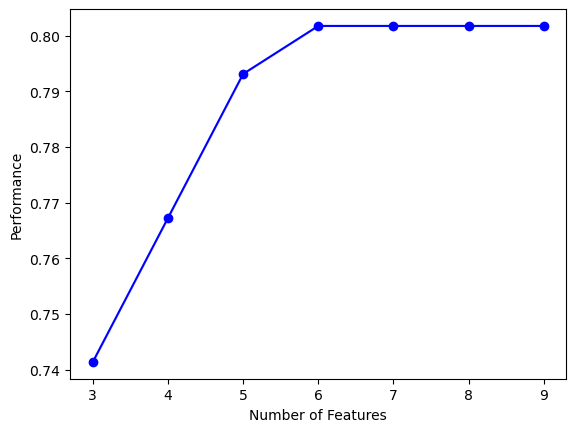

In [15]:
import pandas as pd
#import codecademylib3
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)
sbs.fit(X, y)

# Evaluate the result of sequential backward selection
print(sbs.subsets_[6]['feature_names'])
print(sbs.subsets_[6]['avg_score'])

# Plot the model accuracy
plot_sfs(sbs.get_metric_dict())
plt.show()


In [14]:
print(sbs.subsets_)

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8), 'cv_scores': array([0.80172414]), 'avg_score': 0.8017241379310345, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1')}, 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7), 'cv_scores': array([0.80172414]), 'avg_score': 0.8017241379310345, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin')}, 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7), 'cv_scores': array([0.80172414]), 'avg_score': 0.8017241379310345, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Resistin')}, 6: {'feature_idx': (0, 1, 2, 3, 5, 7), 'cv_scores': array([0.80172414]), 'avg_score': 0.8017241379310345, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')}, 5: {'feature_idx': (0, 1, 2, 3, 7), 'cv_scores': array([0.79310345]), 'avg_score': 0.7931034482758621, 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Resistin')}, 4: {'featur

In [ ]:
'''
k_features indicates the number of features to be selected. It can be any random value, 
but the optimal value can be found by analyzing 
and visualizing the scores for different numbers of features.
'''

In [ ]:
'''
Sequential Forward and Backward Floating Selection
Sequential forward floating selection is a variation of sequential forward selection. 
It starts with zero features and adds one feature at a time, just like sequential forward selection, 
but after each addition, it checks to see if we can improve performance by removing a feature.

If performance can’t be improved, the floating algorithm will continue to the next step and add another feature.
If performance can be improved, the algorithm will make the removal that improves performance the most 
(unless removal of that feature would lead to an infinite loop of adding and removing the same feature over 
and over again).
For example, let’s say that the algorithm has just added weight to the feature set {age, resting_heart_rate}, 
resulting in the set {age, weight, resting_heart_rate}. The floating algorithm will test whether 
it can improve performance by removing age or resting_heart_rate. If the removal of age improves performance, 
then the algorithm will proceed with the set {weight, resting_heart_rate}.

Sequential backward floating selection works similarly. Starting with all available features, 
it removes one feature at a time. After each feature removal, it will check to see if any feature additions 
will improve performance (but it won’t add any features that would result in an infinite loop).

Floating selection algorithms are sometimes preferable to their non-floating counterparts because 
they test the model on more possible feature subsets. They can detect useful relationships between 
variables that plain sequential forward and backward selection might miss.
'''

In [ ]:
'''
Sequential Forward and Backward Floating Selection with mlxtend
We can implement sequential forward or backward floating selection in mlxtend 
by setting the parameter floating to True. The parameter forward determines 
whether mlxtend will use sequential forward floating selection or sequential backward floating selection. 
As usual, the dictionary model.subsets_ will contain useful information about the chosen features.


'''

('Age', 'Glucose', 'Insulin')
('Age', 'Glucose', 'Resistin')
('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')


/Users/robertfokming/opt/anaconda3/envs/feature/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/robertfokming/opt/anaconda3/envs/feature/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


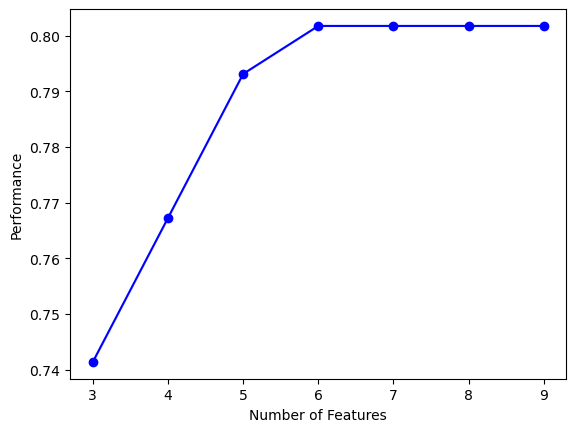

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward floating selection
sffs = SFS(lr,
          k_features=3,
          forward=True,
          floating=True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)

# Print a tuple with the names of the features chosen by sequential forward floating selection.
print(sffs.subsets_[3]['feature_names'])

# Sequential backward floating selection
sbfs = SFS(lr,
          k_features=3,
          forward=False,
          floating=True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)

# Print a tuple with the names of the features chosen by sequential backward floating selection.
print(sbfs.subsets_[3]['feature_names'])
print(sbfs.subsets_[6]['feature_names'])
# Plot the model accuracy
plot_sfs(sbfs.get_metric_dict())
plt.show()


In [21]:
'''
Recursive Feature Elimination
Recursive feature elimination is another wrapper method for feature selection. 
It starts by training a model with all available features. 
It then ranks each feature according to an importance metric and removes the least important feature. 
The algorithm then trains the model on the smaller feature set, 
ranks those features, and removes the least important one. The process stops when the desired number of features 
is reached.

In regression problems, features are ranked by the size of the absolute value of their coefficients. 
For example, let’s say that we trained a regression model with five features and got the 
following regression coefficients.
'''

'\nRecursive Feature Elimination\nRecursive feature elimination is another wrapper method for feature selection. It starts by training a model with all available features. It then ranks each feature according to an importance metric and removes the least important feature. The algorithm then trains the model on the smaller feature set, ranks those features, and removes the least important one. The process stops when the desired number of features is reached.\n\nIn regression problems, features are ranked by the size of the absolute value of their coefficients. For example, let’s say that we trained a regression model with five features and got the following regression coefficients.\n'

In [ ]:
'''
Feature	Regression coefficient
age	2.5
height	7.0
weight	-4.3
blood_pressure	-5.7
resting_heart_rate	-4.6

The regression coefficient for age has the smallest absolute value, 
so it is ranked least important by recursive feature elimination. 
It will be removed, and the remaining four features will be re-ranked after the model is trained without age.

It’s important to note that you might need to standardize data before doing recursive feature elimination. 
In regression problems in particular, it’s necessary to standardize data so that the scale of features 
doesn’t affect the size of the coefficients.

Note that recursive feature elimination is different from sequential backward selection. 
Sequential backward selection removes features by training a model on a collection of subsets 
(one for each possible feature removal) and greedily proceeding with whatever subset performs best. 
Recursive feature elimination, on the other hand, only trains a model on one feature subset 
before deciding which feature to remove next.

This is one advantage of recursive feature elimination. Since it only needs to train and 
test a model on one feature subset per feature removal, it can be much faster than the sequential 
selection methods that we’ve covered.
'''

In [ ]:
'''
Recursive Feature Elimination with scikit-learn
We can use scikit-learn to implement recursive feature elimination. 
Since we’re using a logistic regression model, it’s important to standardize data before we proceed.

We can standardize features using scikit-learn’s StandardScaler().

Once the data is standardized, you can train the model and do recursive feature elimination 
using RFE() from scikit-learn. As before with the sequential feature selection methods, 
you have to specify a scikit-learn model for the estimator parameter (in this case, lr for our logistic regression model).
n_features_to_select is self-explanatory: set it to the number of features you want to select.
'''


In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the data
health = pd.read_csv("dataR2.csv")
X = np.array(health.iloc[:,:-1])
y = np.array(health.iloc[:,-1])

# Standardize the data
X = StandardScaler().fit_transform(X)

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [ ]:
'''
Evaluating the Result of Recursive Feature Elimination
You can inspect the results of recursive feature elimination by looking at rfe.ranking_ and rfe.support_.

rfe.ranking_ is an array that contains the rank of each feature. Here are the features from the fire dataset:

['Temperature', 'RH', 'Ws', 'Rain', 'DMC', 'FWI']
Here are the feature rankings after recursive feature elimination is done on the fire dataset.

print(rfe.ranking_)
[2 5 4 1 3 1]
A 1 at a certain index indicates that recursive feature elimination 
kept the feature at the same index. In this example, the model kept the features at indices 3 and 5: Rain and FWI. The other numbers indicate at which step a feature was removed. The 5 (the highest rank in the array) at index 1 means that RH (the feature at index 1) was removed first. The 4 at index 2 means that Ws (the feature at index 2) was removed in the next step, and so on.

rfe.support_ is an array with True and False values that indicate which features were chosen. 
Here’s an example of what this looks like, again using the fire dataset.

This array indicates that the features at indices 3 and 5 were chosen. The features at indices 0, 1, 2, and 4 were eliminated.

If you have a list of feature names, you can use a list comprehension and rfe.support_ to get a list of chosen feature names.

You can use rfe.score(X, y) to check the accuracy of the model.

'''

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Create a list of feature names
feature_list = list(X.columns)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Logistic regression
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)

# List of features chosen by recursive feature elimination
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]
print(rfe_features)

# Print the accuracy of the model with features chosen by recursive feature elimination
print(rfe.score(X, y))

print(feature_list)
print(rfe.support_)


['BMI', 'Glucose', 'Resistin']
0.7327586206896551
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
[False  True  True False False False False  True False]


In [ ]:
'''
Wrapper methods for feature selection are algorithms that select features by evaluating the performance of a machine learning model on different subsets of features. Here are some advantages of wrapper methods.

They can detect relationships between features that might be relevant to the machine learning model.
Unlike filter methods, they are designed to choose features that are relevant to 
whatever machine learning model you are using.
We covered four different greedy wrapper methods and implemented them using mlextend in Python.

Sequential forward selection adds one feature at a time.
Sequential backward selection removes one feature at a time.
Sequential forward floating selection adds (and sometimes removes) one feature at a time.
Sequential backward floating selection removes (and sometimes adds) one feature at a time.
We also covered recursive feature elimination, which ranks features by importance and 
removes the least important feature at every step. We used the scikit-learn library to implement 
that algorithm and investigate the results.
'''